In [26]:
%%capture
# تستخدم لإخفاء الإخراج المنتج من خلال استخدام السحب (الإلتقاط).
# يمكن استخدامه لمنع طباعة النوافذ الفرعية الخاصة بـ Matplotlib.

import matplotlib.pyplot as plt
from os import listdir

# تثبيت مكتبة scikit-image
!pip install scikit-image
from skimage.io import imread
from skimage.transform import resize
from skimage import img_as_ubyte

# لوحة ألوان تحتوي على 10 ألوان مختلفة.
color_palette = ['blue','green','red','yellow','gray','purple','orange',
'pink','black','brown']


In [34]:
def resize_images_v2(input_folder: str, width: int, height: int, labels_to_keep: list):
    labels = []  # قائمة تحتوي على التصنيف لكل صورة
    resized_images = []  # قائمة تحتوي على الصور المصغرة بتنسيق صفيف numpy
    filenames = []  # قائمة تحتوي على أسماء الملفات الأصلية للصور

    for subfolder in listdir(input_folder):
        print(subfolder)
        path = input_folder + '/' + subfolder  # تصحيح الهمزة هنا
        for file in listdir(path):
            label = subfolder[:-4]  # يستخدم اسم المجلد الفرعي بدون اللاحقة "Head"
            if label not in labels_to_keep:
                continue
            labels.append(label)  # يلصق التصنيف
            # يحمل ويقوم بتغيير الحجم ويعالج ويخزن الصورة.
            resized_images.append(img_as_ubyte(resize(imread(path+'/'+file), (width, height))))
            filenames.append(file)

    return resized_images, labels, filenames


In [47]:
resized_images,labels,filenames=resize_images_v2(
        "AnimalFace/Image",
        width = 224,
        height = 224,
        labels_to_keep=['Lion', 'Chicken', 'Duck', 'Rabbit', 'Deer', 'Cat', 'Wolf', 'Bear', 'Pigeon', 'Eagle']
    )
# بسبب أن البيانات الغير منظمة ستستهلك موارد الحاسب عند المعالجة ويأخذ وقت طويل سيتم تطبيق دالى التحجيم على مجموعة فرعية من الصور 
#المجموعة الفرعية هي عشر فئات 

BearHead
CatHead
ChickenHead
CowHead
DeerHead
DuckHead
EagleHead
ElephantHead
LionHead
MonkeyHead
Natural
PandaHead
PigeonHead
RabbitHead
SheepHead
TigerHead
WolfHead


In [50]:
import random



# يقوم بربط الثلاث قوائم معًا باستخدام zip، بحيث يكونوا قابلين للترتيب معًا عند التشبيك
connected = list(zip(resized_images, labels, filenames))

# يقوم بخلط العناصر في القوائم المتصلة بترتيب عشوائي
random.shuffle(connected)

# يقوم بفصل القوائم الثلاث بعد خلطها
resized_images, labels, filenames = zip(*connected)


In [52]:
import numpy as np  # استيراد مكتبة NumPy وتسميتها باسم np

# يُفترض أن resized_images و labels هما مصفوفتان (أو قوائم) تحتويان على الصور المصغرة والتسميات على التوالي

X = np.array(resized_images)  # إنشاء مصفوفة NumPy من الصور المصغرة وتخزينها في المتغير X
Y = np.array(labels)  # إنشاء مصفوفة NumPy من التسميات وتخزينها في المتغير Y

# X.shape هي الخاصية التي تُظهر الأبعاد (عدد الصفوف والأعمدة) لمصفوفة X
# في هذا السياق، يُطبع شكل (shape) لمصفوفة X
print(X.shape)


(1085, 224, 224, 3)


In [53]:
# X هو مصفوفة الصور ثنائية الأبعاد
# يتم استخدام التعبير التالي لتحويل كل صورة إلى مصفوفة مسطحة
X_flat = np.array([img.flatten() for img in X])

# X_flat هي الآن مصفوفة تحتوي على الصور المسطحة
# يتم استخدام الفهرس [0] للوصول إلى أول صورة مسطحة وطباعة حجمها
print(X_flat[0].shape)

(150528,)


In [59]:
# X_flat[0] يطبع المصفوفة المسطحة الأولى في X_flat
X_flat[0]

array([247, 175, 120, ..., 118, 116, 122], dtype=uint8)

In [61]:
# X_norm هو ناتج تقسيم كل قيمة في X_flat على 255
X_norm = X_flat / 255

# يتم طباعة المصفوفة المسطحة المقيمة (مقسومة على 255) الخاصة بالصورة الأولى
X_norm[0]


array([0.96862745, 0.68627451, 0.47058824, ..., 0.4627451 , 0.45490196,
       0.47843137])

In [9]:
%%capture
!pip install yellowbrick
from yellowbrick.text import TSNEVisualizer

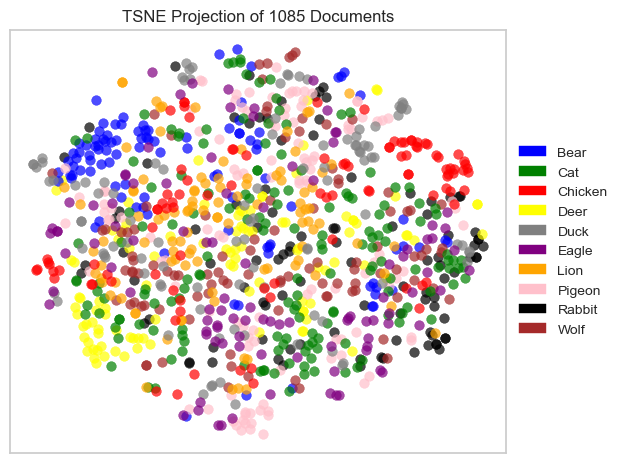

In [10]:
tsne = TSNEVisualizer(colors = color_palette) # initializes the tool
tsne.fit(X_norm, Y) # uses TSNE to reduce the data to 2 dimensions
tsne.show();

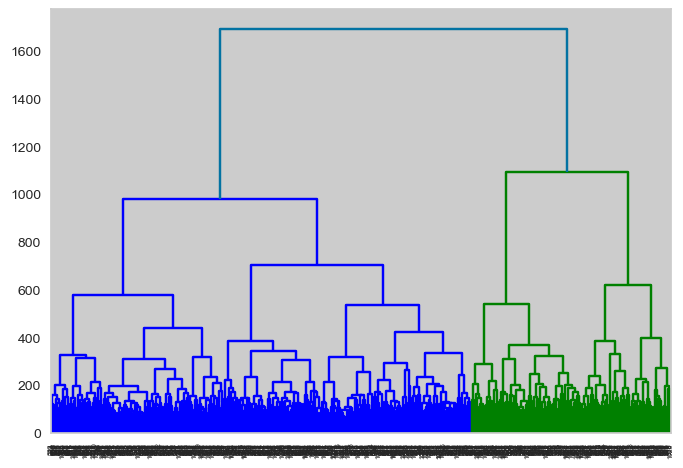

In [11]:
from sklearn.cluster import AgglomerativeClustering # used for agglomerative clustering
import scipy.cluster.hierarchy as hierarchy
hierarchy.set_link_color_palette(color_palette) # sets the color palette
plt.figure()
# iteratively merges points and clusters until all points belong to a single cluster
linkage_flat = hierarchy.linkage(X_norm, method = 'ward')
hierarchy.dendrogram(linkage_flat)
plt.show()

In [12]:
AC = AgglomerativeClustering(linkage = 'ward',n_clusters = 10)
AC.fit(X_norm) # applies the tool to the data
pred = AC.labels_ # gets the cluster labels
pred

array([6, 2, 9, ..., 4, 1, 0], dtype=int64)

In [13]:

from sklearn.metrics import homogeneity_score, adjusted_rand_score, completeness_score

print('\nHomogeneity score:', homogeneity_score(Y, pred))
print('\nAdjusted Rand score:', adjusted_rand_score(Y, pred))
print('\nCompleteness score:', completeness_score(Y, pred))


Homogeneity score: 0.09868725008128476

Adjusted Rand score: 0.038254515908926826

Completeness score: 0.10189712309658398


In [14]:
from skimage.color import rgb2gray
from skimage.feature import hog
# converts the list of resized images to an array of grayscale images
X_gray = np.array([rgb2gray(img) for img in resized_images])
# computes the HOG features for each grayscale image in the array
X_hog = np.array([hog(img) for img in X_gray])
X_hog.shape

(1085, 54756)

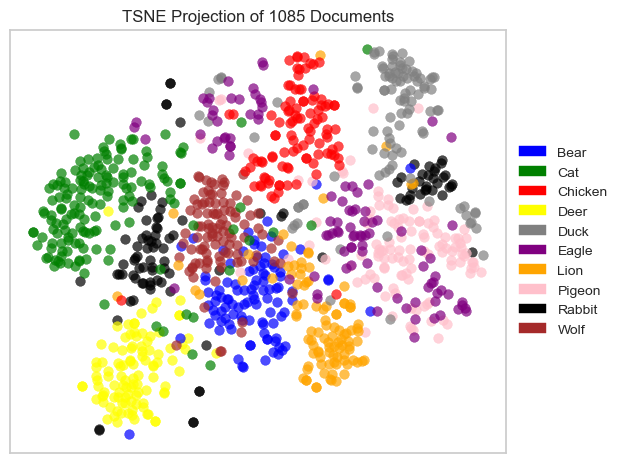

In [15]:
tsne = TSNEVisualizer(colors = color_palette)
tsne.fit(X_hog, Y)
tsne.show();

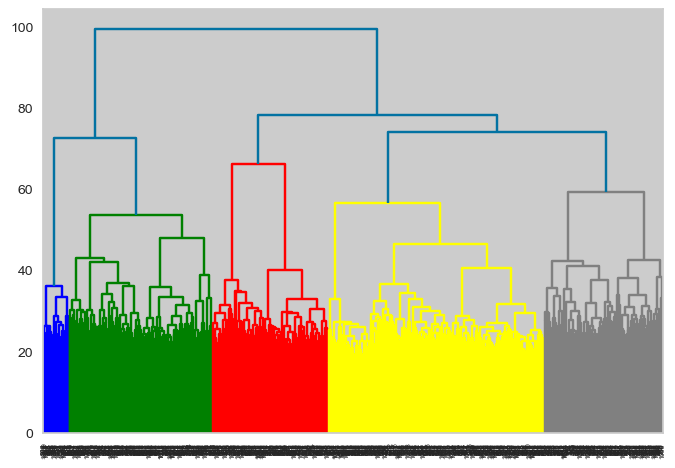

In [16]:
plt.figure()
linkage_2 = hierarchy.linkage(X_hog,method = 'ward')
hierarchy.dendrogram(linkage_2)
plt.show()

In [17]:
AC = AgglomerativeClustering(linkage = 'ward', n_clusters = 5)
AC.fit(X_hog)
pred = AC.labels_
print('\nHomogeneity score:', homogeneity_score(Y, pred))
print('\nAdjusted Rand score:', adjusted_rand_score(Y, pred))
print('\nCompleteness score:', completeness_score(Y, pred))


Homogeneity score: 0.40463406123309864

Adjusted Rand score: 0.29990205334627734

Completeness score: 0.6306921317302155


In [18]:
AC = AgglomerativeClustering(linkage = 'ward', n_clusters = 10)
AC.fit(X_hog)
pred = AC.labels_
print('\nHomogeneity score:', homogeneity_score(Y, pred))
print('\nAdjusted Rand score:', adjusted_rand_score(Y, pred))
print('\nCompleteness score:', completeness_score(Y, pred))


Homogeneity score: 0.5720932612704412

Adjusted Rand score: 0.41243540297103065

Completeness score: 0.617016965322667


In [19]:
from keras.applications.vgg16 import VGG16 # used to access the pre-trained VGG16 model
from keras.models import Model
model = VGG16() # loads the pretrained VGG16 model
# removes the output layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [20]:
from keras.applications.vgg16 import preprocess_input
X_prep = preprocess_input(X)
X_prep.shape

(1085, 224, 224, 3)

In [21]:
X_VGG16 = model.predict(X_prep, use_multiprocessing = True)
X_VGG16.shape

34/34 [==============================] - 162s 4s/step


(1085, 4096)

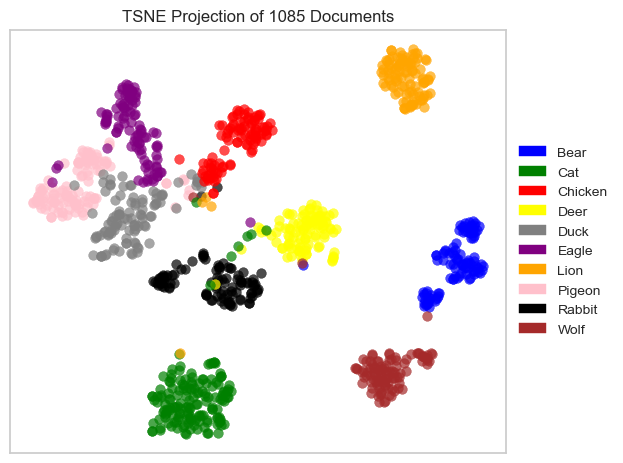

In [22]:
tsne = TSNEVisualizer(colors = color_palette)
tsne.fit(X_VGG16, labels)
tsne.show();

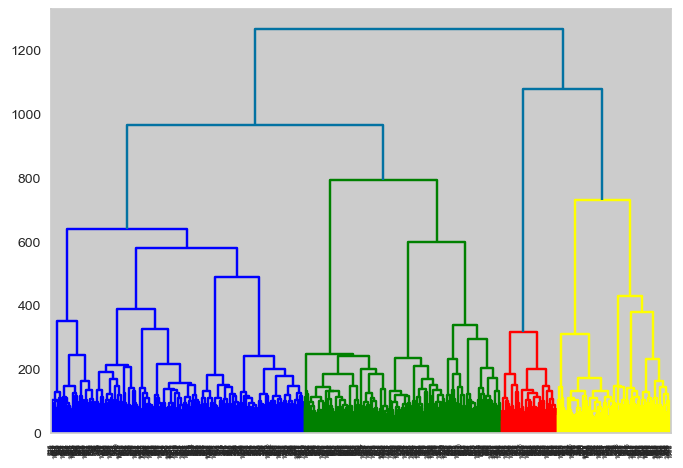

In [23]:
linkage_3 = hierarchy.linkage(X_VGG16, method = 'ward')
plt.figure()
hierarchy.dendrogram(linkage_3)
plt.show()

In [24]:
AC = AgglomerativeClustering(linkage = 'ward',n_clusters = 4)
AC.fit(X_VGG16)
pred=AC.labels_
print('\nHomogeneity score:', homogeneity_score(Y, pred))
print('\nAdjusted Rand score:', adjusted_rand_score(Y, pred))
print('\nCompleteness score:', completeness_score(Y, pred))


Homogeneity score: 0.5046874560158231

Adjusted Rand score: 0.37265351562538257

Completeness score: 0.9193141240200561


In [25]:
AC = AgglomerativeClustering(linkage='ward',n_clusters = 10)
AC.fit(X_VGG16)
pred=AC.labels_
print('\nHomogeneity score:', homogeneity_score(Y, pred))
print('\nAdjusted Rand score:', adjusted_rand_score(Y, pred))
print('\nCompleteness score:', completeness_score(Y, pred))


Homogeneity score: 0.8403973102506642

Adjusted Rand score: 0.766734821176714

Completeness score: 0.8509145102288217
